<h1> Vitesse du son dans les bandes acoustiques pour ScCuO2 </h1>

In [9]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import *
import matplotlib.pyplot as plt
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors

In [10]:
mp_key = "emUreNDiEdgEatR8YwlD3hfzF9Onx8tt"
mp_id = "mp-4636"

In [11]:
with MPRester(mp_key) as m:
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

<h2> Structure de bande des phonons </h2>

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

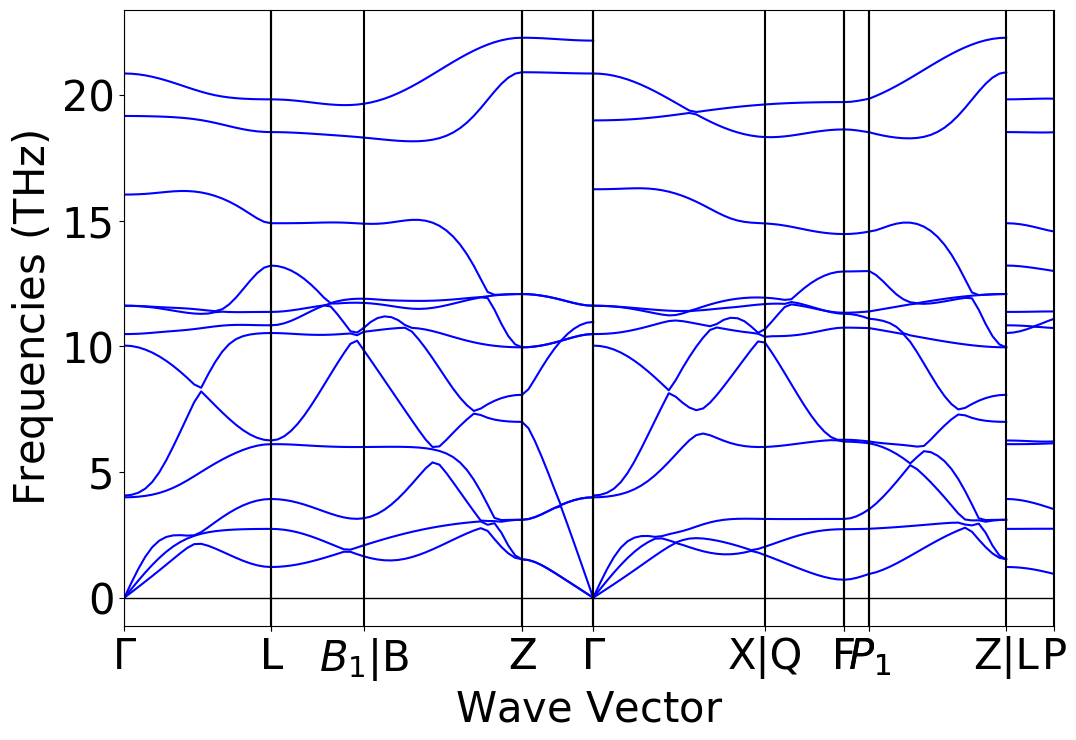

In [18]:
band = m.get_phonon_bandstructure_by_material_id(mp_id)
bsplotter = PhononBSPlotter(band)
bsplotter.show()

<h2> Zone de Brillouin du ScCuO2 </h2>

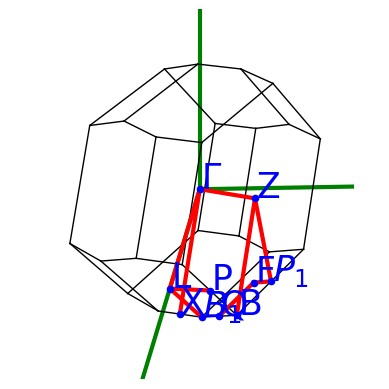

In [7]:
bsplotter.plot_brillouin()

<h2> Branches acoustiques </h2>

Tout d'abord, il nous faut déterminer les  différentes branches acoustiques. Les branches acoustiques sont les branches pour lesquelles la fréquence du phonon associé est nulle ($\omega = 0$) au centre de la zone de Brillouin, qui est représenté sur le graphe ci-dessus par le point $\Gamma$. En analysant le graphe représentant la structure de bande des phonons, on voit qu'on a donc trois directions possibles pour les branches acoustiques: la direction $\Gamma - X|Q$, la direction $\Gamma - Z$ ainsi que la direction $\Gamma - L$. Le graphe ci-dessous montre quelles sont donc les branches acoustiques, elles sont représentées en rose, bleu et vert. On voit bien que leur fréquence s'annule au point $\Gamma$.

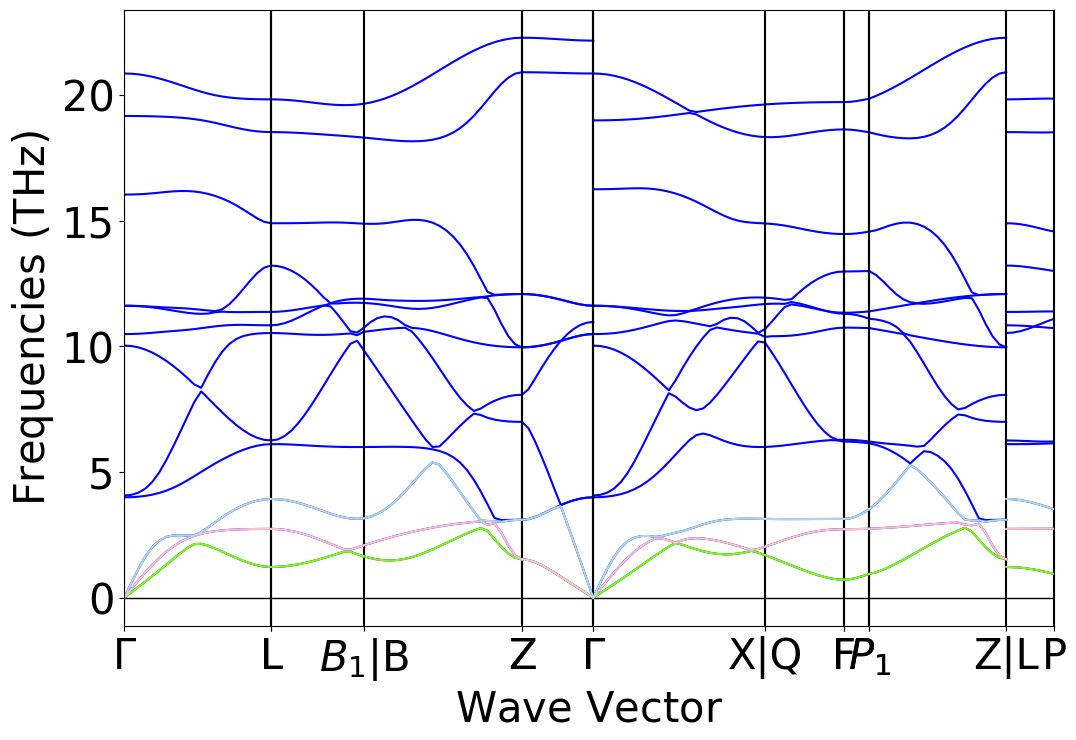

In [19]:
bsplotter.get_plot()
data = bsplotter.bs_plot_data() 
dist = data.get("distances")
freq = data.get("frequency")
for i in range(len(dist)):
    plt.plot(dist[i], freq[i][0], 'chartreuse')
    plt.plot(dist[i], freq[i][1], 'pink')
    plt.plot(dist[i], freq[i][2], 'lightblue')

<h2> Calcul de la vitesse du son pour les trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin </h2>

La vitesse du son dans une direction de la zone de Brillouin est donnée par la formule $v_s = \frac{d\omega}{dq}$. On va utilise l'hypothèse que $q\rightarrow 0$ et que $\omega$ est proche de zéro afin de pouvoir utiliser une relation linéaire.
Donc, pour calculer cette vitesse du son, il nous suffit de déterminer la pente de cette relation linéaire. Pour cela, nous allons utiliser des petites valeurs de vecteur d'onde q et déduire cette valeur à l'aide de notre graphe.

<h3> Vitesse du son dans la direction $\Gamma - X|Q$ </h3>

In [56]:
ang = 10**(-10)
x00 = dist[4][1]/ang
x01 = dist[4][0]/ang
y00 = 2*np.pi*freq[4][0][1]*10**(12)
y01 = 2*np.pi*freq[4][0][0]*10**(12)

vs1 = abs((y01-y00)/(x01-x00))
print("Vitesse du son pour la première branche (verte) :", vs1, "m/s.\n")


Vitesse du son pour la première branche (verte) : 2080.939569423684 m/s.



<h3> Vitesse du son dans la direction $Z - \Gamma$ </h3>

In [57]:
ang = 10**(-10)
x10 = dist[3][-1]/ang
x11 = dist[3][-2]/ang
y10 = 2*np.pi*freq[3][1][-1]*10**(12)
y11 = 2*np.pi*freq[3][1][-2]*10**(12)

vs2 = abs((y11-y10)/(x11-x10))
print("Vitesse du son pour la deuxième branche (rose) :", vs2, "m/s.\n")

Vitesse du son pour la deuxième branche (rose) : 2084.7804771482984 m/s.



<h3> Vitesse du son dans la direction $\Gamma - L$ </h3>

In [58]:
ang = 10**(-10)
x20 = dist[0][1]/ang
x21 = dist[0][0]/ang
y20 = 2*np.pi*freq[0][2][1]*10**(12)
y21 = 2*np.pi*freq[0][2][0]*10**(12)

vs3 = abs((y21-y20)/(x21-x20))
print("Vitesse du son pour la troisième branche (bleu clair) :", vs3, "m/s.\n")

Vitesse du son pour la troisième branche (bleu clair) : 6728.69811702382 m/s.



Nous pouvons voir que les vitesses sont de l'ordre d'environ 2 km/s à 7 km/s. Cela semble cohérent car c'est plus rapide que la vitesse du son dans l'air (=1224 m/s) mais bien moins rapide que la vitesse du son dans le diamant qui est la vitesse maximale (= 12000 m/s).